In [1]:
from datetime import datetime

import torch
from torch.utils.data import DataLoader

from datasets.CSVDataset import CSVDataset
from models.inception import InceptionV3BinaryClassifier
from models.mlp import MLPBinaryClassifier
from models.resnet import Resnet50BinaryClassifier
from stopper.EarlyStopper import EarlyStopper
from train import train_classifier
from utils import plot_model_metrics
from utils import reduce_dataset, split_dataset
from models.resnet import Resnet18BinaryClassifier


In [2]:




from models.resnet import Resnet101BinaryClassifier

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

batch_size = 4096

PretrainedModelClass = Resnet101BinaryClassifier
pretrained_model_name = PretrainedModelClass.get_pretrained_model_name()
pretrained_output_size = PretrainedModelClass.pretrained_output_size
features_csv_file_name = f"{PretrainedModelClass.get_pretrained_model_name()}_{pretrained_output_size}_features.csv"
dataset = CSVDataset(f"output/candidates/{features_csv_file_name}")
dataset = reduce_dataset(dataset, discard_ratio=0.0)
train_dataset, test_dataset = split_dataset(dataset, train_ratio=0.8)
# train_dataset = undersample_dataset(train_dataset)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         shuffle=True, )
#(36/162) (hidden_layers=1, units=2048, dropout=0.1, threshold=0.5, learning_rate=3e-05, weight_decay=0.0, focal_alpha=0.75, focal_gamma=2.5)
# (hidden_layers=3, units=2048, dropout=0.2, threshold=0.5, learning_rate=3e-05, weight_decay=0.0, focal_alpha=0.75, focal_gamma=2.5)
model = MLPBinaryClassifier(in_features=pretrained_output_size, hidden_layers=2, units_per_layer=2048,
                            dropout=0.1, focal_alpha=0.75, focal_gamma=2.5)

print(f"Dataset: {len(train_dataset):,} training, {len(test_dataset):,} testing")


Device: cuda:0


FileNotFoundError: [Errno 2] No such file or directory: 'output/candidates/Resnet101_2048_features.csv'

In [3]:
print(model)

MLPBinaryClassifier(
  (model): Sequential(
    (0): Linear(in_features=512, out_features=2048, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=2048, out_features=2048, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=2048, out_features=2048, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.1, inplace=False)
    (9): Linear(in_features=2048, out_features=1, bias=True)
    (10): Sigmoid()
  )
)


In [4]:
print(f"Training starts {datetime.now().isoformat()}")

Training starts 2025-02-09T09:07:43.449589


In [5]:

model = model.to(device)
model, model_metrics = train_classifier(model, train_loader, test_loader, device,
                                        start_learning_rate=0.000030,
                                        min_learning_rate=0.000010,
                                        lr_warmup_steps=10,
                                        max_epochs=50,
                                        checkpoint_every=1,
                                        eval_every=1,
                                        early_stopper=None)

Epoch 1 training: 100%|██████████| 39/39 [00:01<00:00, 27.85it/s]


Train: 1/50: lr: 0.000030000000 loss:0.008927979518492252


Epoch 1 testing: 100%|██████████| 10/10 [00:00<00:00, 37.44it/s]


Test: 1/50: loss:0.006269519170746207, accuracy:0.9897164681470649, precision:0.0, recall:0.0, f1:0.0, mcc:0.0, ece:0.010283531807363033, pr_auc:0.0551293412201017, epoch:1


Epoch 2 training: 100%|██████████| 39/39 [00:01<00:00, 32.92it/s]


Train: 2/50: lr: 0.000030000000 loss:0.005435209745206894


Epoch 2 testing: 100%|██████████| 10/10 [00:00<00:00, 30.89it/s]


Test: 2/50: loss:0.004740142077207565, accuracy:0.9897996523501643, precision:0.0, recall:0.0, f1:0.0, mcc:0.0, ece:0.010200347658246756, pr_auc:0.1493660873758877, epoch:2


Epoch 3 training: 100%|██████████| 39/39 [00:01<00:00, 21.87it/s]


Train: 3/50: lr: 0.000030000000 loss:0.00451157009229064


Epoch 3 testing: 100%|██████████| 10/10 [00:00<00:00, 17.12it/s]


Test: 3/50: loss:0.0042549340520054105, accuracy:0.9894954587438424, precision:0.36939075630252105, recall:0.09622568302472448, f1:0.1512282863828059, mcc:0.18328722002227116, ece:0.010504541266709567, pr_auc:0.18265608271595832, epoch:3


Epoch 4 training: 100%|██████████| 39/39 [00:02<00:00, 14.08it/s]


Train: 4/50: lr: 0.000030000000 loss:0.004295828435808802


Epoch 4 testing: 100%|██████████| 10/10 [00:00<00:00, 14.89it/s]


Test: 4/50: loss:0.004151011072099209, accuracy:0.9895820905813834, precision:0.44175685425685424, recall:0.12308488011797691, f1:0.19191645224857065, mcc:0.22882481077210368, ece:0.010417909361422062, pr_auc:0.24221630974118263, epoch:4


Epoch 5 training: 100%|██████████| 39/39 [00:02<00:00, 14.39it/s]


Train: 5/50: lr: 0.000030000000 loss:0.004093042103191599


Epoch 5 testing: 100%|██████████| 10/10 [00:00<00:00, 14.62it/s]


Test: 5/50: loss:0.003989140084013343, accuracy:0.9886465789845034, precision:0.3961541755134433, recall:0.2382608079354355, f1:0.29448371178635296, mcc:0.300187457723854, ece:0.01135342102497816, pr_auc:0.2759802201843719, epoch:5


Epoch 6 training: 100%|██████████| 39/39 [00:03<00:00, 12.81it/s]


Train: 6/50: lr: 0.000030000000 loss:0.003925153006536839


Epoch 6 testing: 100%|██████████| 10/10 [00:00<00:00, 14.00it/s]


Test: 6/50: loss:0.003940656501799822, accuracy:0.9889507725908251, precision:0.44947712418300656, recall:0.26635132265567046, f1:0.32644350452018295, mcc:0.3361470729638216, ece:0.01104922741651535, pr_auc:0.30952310893152474, epoch:6


Epoch 7 training: 100%|██████████| 39/39 [00:02<00:00, 13.69it/s]


Train: 7/50: lr: 0.000030000000 loss:0.003792351965482036


Epoch 7 testing: 100%|██████████| 10/10 [00:00<00:00, 13.77it/s]


Test: 7/50: loss:0.003813922102563083, accuracy:0.9892802622126438, precision:0.4538824625666732, recall:0.30800139896158024, f1:0.36407672323093104, mcc:0.36719716901157695, ece:0.01071973778307438, pr_auc:0.330471877766341, epoch:7


Epoch 8 training: 100%|██████████| 39/39 [00:03<00:00, 12.88it/s]


Train: 8/50: lr: 0.000030000000 loss:0.0036895778089857255


Epoch 8 testing: 100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


Test: 8/50: loss:0.003663936094380915, accuracy:0.9893867780813833, precision:0.46294482337585785, recall:0.32145430099088634, f1:0.3761800923666655, mcc:0.3788846789583665, ece:0.01061322195455432, pr_auc:0.3497075767595354, epoch:8


Epoch 9 training: 100%|██████████| 39/39 [00:03<00:00, 12.62it/s]


Train: 9/50: lr: 0.000030000000 loss:0.003616506562162286


Epoch 9 testing: 100%|██████████| 10/10 [00:00<00:00, 15.39it/s]


Test: 9/50: loss:0.003933969396166503, accuracy:0.9847370817939245, precision:0.32692934697125614, recall:0.5119621888377656, f1:0.3971247248027365, mcc:0.40083779871368835, ece:0.015262918267399072, pr_auc:0.35031340919535653, epoch:9


Epoch 10 training: 100%|██████████| 39/39 [00:03<00:00, 11.72it/s]


Train: 10/50: lr: 0.000029945219 loss:0.0035526282213723813


Epoch 10 testing: 100%|██████████| 10/10 [00:00<00:00, 12.80it/s]


Test: 10/50: loss:0.003634786931797862, accuracy:0.9897763206845237, precision:0.48586438363191087, recall:0.30688574735902335, f1:0.3728795260459675, mcc:0.37953818305053133, ece:0.01022367924451828, pr_auc:0.36611692726657935, epoch:10


Epoch 11 training: 100%|██████████| 39/39 [00:03<00:00, 12.08it/s]


Train: 11/50: lr: 0.000029781476 loss:0.003446511189954785


Epoch 11 testing: 100%|██████████| 10/10 [00:00<00:00, 12.35it/s]


Test: 11/50: loss:0.003615944599732757, accuracy:0.9877966168283046, precision:0.39699262611027314, recall:0.4215449131014699, f1:0.40682153965477286, mcc:0.4019168429580969, ece:0.012203383166342974, pr_auc:0.3758068389898107, epoch:11


Epoch 12 training: 100%|██████████| 39/39 [00:03<00:00, 11.77it/s]


Train: 12/50: lr: 0.000029510565 loss:0.003348776813930808


Epoch 12 testing: 100%|██████████| 10/10 [00:00<00:00, 12.45it/s]


Test: 12/50: loss:0.003544487850740552, accuracy:0.990144696415743, precision:0.5177937627506592, recall:0.34544177184532715, f1:0.4112263415927119, mcc:0.4165473870821038, ece:0.0098553036339581, pr_auc:0.39054648152004245, epoch:12


Epoch 13 training: 100%|██████████| 39/39 [00:03<00:00, 11.54it/s]


Train: 13/50: lr: 0.000029135455 loss:0.0032679929505460537


Epoch 13 testing: 100%|██████████| 10/10 [00:00<00:00, 11.99it/s]


Test: 13/50: loss:0.003727741842158139, accuracy:0.9838914492251642, precision:0.3199580318510019, recall:0.5384378060167156, f1:0.3985944477255121, mcc:0.4060543782615175, ece:0.016108550783246755, pr_auc:0.39084929625200243, epoch:13


Epoch 14 training: 100%|██████████| 39/39 [00:03<00:00, 11.58it/s]


Train: 14/50: lr: 0.000028660254 loss:0.0031505119210729995


Epoch 14 testing: 100%|██████████| 10/10 [00:00<00:00, 11.66it/s]


Test: 14/50: loss:0.0035996908321976663, accuracy:0.9902501298876232, precision:0.514648532508507, recall:0.358155205036517, f1:0.4209772978562281, mcc:0.42390536088794784, ece:0.009749870095402003, pr_auc:0.38759306437584323, epoch:14


Epoch 15 training: 100%|██████████| 39/39 [00:03<00:00, 11.23it/s]


Train: 15/50: lr: 0.000028090170 loss:0.0030606507431142605


Epoch 15 testing: 100%|██████████| 10/10 [00:00<00:00, 11.53it/s]


Test: 15/50: loss:0.003541996655985713, accuracy:0.9864616206126847, precision:0.3692694659521444, recall:0.4821573237417269, f1:0.41678665092699385, mcc:0.4145439908532091, ece:0.013538379315286874, pr_auc:0.3994817933692655, epoch:15


Epoch 16 training: 100%|██████████| 39/39 [00:03<00:00, 10.73it/s]


Train: 16/50: lr: 0.000027431448 loss:0.0030486604545074394


Epoch 16 testing: 100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


Test: 16/50: loss:0.0034578123595565557, accuracy:0.9897197153376437, precision:0.47674051030668674, recall:0.37767323712879736, f1:0.4156917768867242, mcc:0.41634622923946163, ece:0.010280284751206636, pr_auc:0.38783153425725647, epoch:16


Epoch 17 training: 100%|██████████| 39/39 [00:03<00:00,  9.95it/s]


Train: 17/50: lr: 0.000026691306 loss:0.0029200557082031784


Epoch 17 testing: 100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


Test: 17/50: loss:0.003593295160681009, accuracy:0.9897019961001643, precision:0.49636742743983236, recall:0.3979888906981375, f1:0.44006599627133464, mcc:0.4385100622011665, ece:0.010298003815114498, pr_auc:0.40585284142850286, epoch:17


Epoch 18 training: 100%|██████████| 39/39 [00:03<00:00, 10.58it/s]


Train: 18/50: lr: 0.000025877853 loss:0.002851662787202841


Epoch 18 testing: 100%|██████████| 10/10 [00:00<00:00, 10.93it/s]


Test: 18/50: loss:0.0034233430633321404, accuracy:0.9878087236376232, precision:0.3975655605856701, recall:0.4534877872495297, f1:0.4221949266496887, mcc:0.4177466410102948, ece:0.01219127643853426, pr_auc:0.4249217066115598, epoch:18


Epoch 19 training: 100%|██████████| 39/39 [00:03<00:00, 10.26it/s]


Train: 19/50: lr: 0.000025000000 loss:0.002786718917867312


Epoch 19 testing: 100%|██████████| 10/10 [00:00<00:00, 10.73it/s]


Test: 19/50: loss:0.00346828147303313, accuracy:0.9873681881157635, precision:0.39491880781677413, recall:0.4831662436668694, f1:0.430992799769638, mcc:0.42871372377254024, ece:0.012631811946630479, pr_auc:0.4088436563002478, epoch:19


Epoch 20 training: 100%|██████████| 39/39 [00:03<00:00, 10.09it/s]


Train: 20/50: lr: 0.000024067366 loss:0.002716681481195757


Epoch 20 testing: 100%|██████████| 10/10 [00:00<00:00, 10.25it/s]


Test: 20/50: loss:0.0035128670977428557, accuracy:0.9897873450969827, precision:0.49151487272176936, recall:0.3988451303216247, f1:0.4362942324418636, mcc:0.43564822685392823, ece:0.010212654899805784, pr_auc:0.40952119755758776, epoch:20


Epoch 21 training: 100%|██████████| 39/39 [00:04<00:00,  9.59it/s]


Train: 21/50: lr: 0.000023090170 loss:0.002666920238437179


Epoch 21 testing: 100%|██████████| 10/10 [00:00<00:00, 10.19it/s]


Test: 21/50: loss:0.003432114701718092, accuracy:0.9881483557189039, precision:0.4165421983983616, recall:0.4386151366155572, f1:0.4256163948005615, mcc:0.42064003138634354, ece:0.011851644236594438, pr_auc:0.41951225429251593, epoch:21


Epoch 22 training: 100%|██████████| 39/39 [00:03<00:00,  9.84it/s]


Train: 22/50: lr: 0.000022079117 loss:0.0025569820651211417


Epoch 22 testing: 100%|██████████| 10/10 [00:01<00:00,  9.81it/s]


Test: 22/50: loss:0.0035276579670608043, accuracy:0.9894677974907635, precision:0.46747089453585666, recall:0.40289748319009633, f1:0.4281859056272553, mcc:0.4264510224405938, ece:0.010532202571630478, pr_auc:0.40428273714219093, epoch:22


Epoch 23 training: 100%|██████████| 39/39 [00:04<00:00,  9.18it/s]


Train: 23/50: lr: 0.000021045285 loss:0.0025058085373483407


Epoch 23 testing: 100%|██████████| 10/10 [00:01<00:00,  9.87it/s]


Test: 23/50: loss:0.003558654966764152, accuracy:0.9890339567939245, precision:0.4493302297953461, recall:0.405270108736928, f1:0.42278137843273045, mcc:0.419558866067067, ece:0.010966043174266814, pr_auc:0.40638612043953837, epoch:23


Epoch 24 training: 100%|██████████| 39/39 [00:04<00:00,  9.16it/s]


Train: 24/50: lr: 0.000020000000 loss:0.00243424145409312


Epoch 24 testing: 100%|██████████| 10/10 [00:01<00:00,  8.61it/s]


Test: 24/50: loss:0.003497054358012974, accuracy:0.9850678542564655, precision:0.34083156832669487, recall:0.4949420744570592, f1:0.402065896600186, mcc:0.40264538074082223, ece:0.014932145830243826, pr_auc:0.41012633900836815, epoch:24


Epoch 25 training: 100%|██████████| 39/39 [00:04<00:00,  9.34it/s]


Train: 25/50: lr: 0.000018954715 loss:0.002339887480514172


Epoch 25 testing: 100%|██████████| 10/10 [00:01<00:00,  8.55it/s]


Test: 25/50: loss:0.003456966974772513, accuracy:0.9886454965876437, precision:0.4343470064734222, recall:0.44939612006684404, f1:0.438376889956432, mcc:0.434429436260465, ece:0.011354503408074378, pr_auc:0.410351712915692, epoch:25


Epoch 26 training: 100%|██████████| 39/39 [00:04<00:00,  8.81it/s]


Train: 26/50: lr: 0.000017920883 loss:0.0023008250625421987


Epoch 26 testing: 100%|██████████| 10/10 [00:01<00:00,  8.42it/s]


Test: 26/50: loss:0.0035244143102318047, accuracy:0.9863739063782841, precision:0.3688162664680243, recall:0.477178208383935, f1:0.4131517616859582, mcc:0.4113102542040674, ece:0.013626093417406083, pr_auc:0.4152061578940569, epoch:26


Epoch 27 training: 100%|██████████| 39/39 [00:04<00:00,  8.86it/s]


Train: 27/50: lr: 0.000016909830 loss:0.0022001972851844933


Epoch 27 testing: 100%|██████████| 10/10 [00:01<00:00,  8.28it/s]


Test: 27/50: loss:0.003478735126554966, accuracy:0.9865391923876231, precision:0.37402633624595816, recall:0.48533720921878826, f1:0.41998942697381947, mcc:0.41816679976516885, ece:0.013460807595402002, pr_auc:0.41176791617188835, epoch:27


Epoch 28 training: 100%|██████████| 39/39 [00:04<00:00,  8.45it/s]


Train: 28/50: lr: 0.000015932634 loss:0.0021594971304950425


Epoch 28 testing: 100%|██████████| 10/10 [00:01<00:00,  7.62it/s]


Test: 28/50: loss:0.003581000817939639, accuracy:0.9888408090876437, precision:0.4394943985161377, recall:0.42260591663067276, f1:0.4264341662550719, mcc:0.4231728341761626, ece:0.011159190908074379, pr_auc:0.4156961525332091, epoch:28


Epoch 29 training: 100%|██████████| 39/39 [00:04<00:00,  8.57it/s]


Train: 29/50: lr: 0.000015000000 loss:0.0021394087264362052


Epoch 29 testing: 100%|██████████| 10/10 [00:01<00:00,  7.87it/s]


Test: 29/50: loss:0.0035702164517715574, accuracy:0.9889073564501232, precision:0.450859299391096, recall:0.41974339540095207, f1:0.43129249993646523, mcc:0.42775048056727505, ece:0.011092643532902003, pr_auc:0.41431341172028296, epoch:29


Epoch 30 training: 100%|██████████| 39/39 [00:04<00:00,  8.40it/s]


Train: 30/50: lr: 0.000014122147 loss:0.0020434028612306486


Epoch 30 testing: 100%|██████████| 10/10 [00:01<00:00,  8.49it/s]


Test: 30/50: loss:0.0035531144589185716, accuracy:0.9875613358220443, precision:0.3993254577530837, recall:0.4558765601045268, f1:0.4223321106534151, mcc:0.41873870378280953, ece:0.012438664119690657, pr_auc:0.401094929815459, epoch:30


Epoch 31 training: 100%|██████████| 39/39 [00:04<00:00,  8.03it/s]


Train: 31/50: lr: 0.000013308694 loss:0.0020331191525866208


Epoch 31 testing: 100%|██████████| 10/10 [00:01<00:00,  8.30it/s]


Test: 31/50: loss:0.003648881730623543, accuracy:0.9884979298157841, precision:0.43044752616419013, recall:0.43150123825010195, f1:0.427917422374353, mcc:0.4236850997874549, ece:0.011502070166170598, pr_auc:0.42091840105403094, epoch:31


Epoch 32 training: 100%|██████████| 39/39 [00:04<00:00,  8.06it/s]


Train: 32/50: lr: 0.000012568552 loss:0.001953109991378509


Epoch 32 testing: 100%|██████████| 10/10 [00:01<00:00,  8.01it/s]


Test: 32/50: loss:0.0038671406917274, accuracy:0.9898318436345444, precision:0.5018027475163565, recall:0.399777491861267, f1:0.4399902268388514, mcc:0.44028956773312694, ece:0.010168156307190656, pr_auc:0.40438652872600783, epoch:32


Epoch 33 training: 100%|██████████| 39/39 [00:04<00:00,  7.87it/s]


Train: 33/50: lr: 0.000011909830 loss:0.0019563472925279387


Epoch 33 testing: 100%|██████████| 10/10 [00:01<00:00,  8.05it/s]


Test: 33/50: loss:0.003598107327707112, accuracy:0.9848258784251847, precision:0.3338618677135199, recall:0.5137655335905577, f1:0.40362642197995857, mcc:0.4063269090291904, ece:0.015174121502786875, pr_auc:0.40847282799505535, epoch:33


Epoch 34 training: 100%|██████████| 39/39 [00:04<00:00,  7.86it/s]


Train: 34/50: lr: 0.000011339746 loss:0.0018868825655096234


Epoch 34 testing: 100%|██████████| 10/10 [00:01<00:00,  7.19it/s]


Test: 34/50: loss:0.0037196190562099217, accuracy:0.9886843826970443, precision:0.44500463402902424, recall:0.43742903669374256, f1:0.4396766330025552, mcc:0.4347573831888156, ece:0.011315617337822914, pr_auc:0.4113622651339496, epoch:34


Epoch 35 training: 100%|██████████| 39/39 [00:04<00:00,  7.92it/s]


Train: 35/50: lr: 0.000010864545 loss:0.0018440713711942618


Epoch 35 testing: 100%|██████████| 10/10 [00:01<00:00,  7.80it/s]


Test: 35/50: loss:0.0038736637914553286, accuracy:0.9898495628720237, precision:0.4971201929432184, recall:0.40020727011816193, f1:0.43867408866502433, mcc:0.4386241519953183, ece:0.01015043705701828, pr_auc:0.410596043731573, epoch:35


Epoch 36 training: 100%|██████████| 39/39 [00:05<00:00,  7.43it/s]


Train: 36/50: lr: 0.000010489435 loss:0.0018552854710903305


Epoch 36 testing: 100%|██████████| 10/10 [00:01<00:00,  8.00it/s]


Test: 36/50: loss:0.0038781238719820975, accuracy:0.9892003252001231, precision:0.46850583508968596, recall:0.43064406081994183, f1:0.4454692504927212, mcc:0.44210364999952523, ece:0.010799674782902002, pr_auc:0.41723211011384825, epoch:36


Epoch 37 training: 100%|██████████| 39/39 [00:05<00:00,  7.54it/s]


Train: 37/50: lr: 0.000010218524 loss:0.001781837928156631


Epoch 37 testing: 100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


Test: 37/50: loss:0.0038272397825494407, accuracy:0.9897041608938834, precision:0.47707852106113047, recall:0.41062922567865423, f1:0.43797269885543405, mcc:0.43578804720381975, ece:0.010295839048922062, pr_auc:0.40662802258302344, epoch:37


Epoch 38 training: 100%|██████████| 39/39 [00:05<00:00,  7.53it/s]


Train: 38/50: lr: 0.000010054781 loss:0.0017307123575264062


Epoch 38 testing: 100%|██████████| 10/10 [00:01<00:00,  7.02it/s]


Test: 38/50: loss:0.0039488101378083226, accuracy:0.9895732309626437, precision:0.48195363266764196, recall:0.4176401306727705, f1:0.44513377787163294, mcc:0.4422664991579168, ece:0.010426769033074379, pr_auc:0.4080796881820157, epoch:38


Epoch 39 training: 100%|██████████| 39/39 [00:05<00:00,  7.47it/s]


Train: 39/50: lr: 0.000010000000 loss:0.001696525401292512


Epoch 39 testing: 100%|██████████| 10/10 [00:01<00:00,  6.90it/s]


Test: 39/50: loss:0.0037821719655767084, accuracy:0.9871363547439451, precision:0.38494879038482, recall:0.45054466606427884, f1:0.41258386540825115, mcc:0.408740246236072, ece:0.01286364533007145, pr_auc:0.4006927845786642, epoch:39


Epoch 40 training: 100%|██████████| 39/39 [00:05<00:00,  7.21it/s]


Train: 40/50: lr: 0.000010000000 loss:0.0016647938292664595


Epoch 40 testing: 100%|██████████| 10/10 [00:01<00:00,  6.68it/s]


Test: 40/50: loss:0.004222279670648277, accuracy:0.9902324106501437, precision:0.5269947138003637, recall:0.3743272093336191, f1:0.4355360413867209, mcc:0.4382883618421537, ece:0.009767589345574378, pr_auc:0.4043900799925685, epoch:40


Epoch 41 training: 100%|██████████| 39/39 [00:05<00:00,  7.18it/s]


Train: 41/50: lr: 0.000010000000 loss:0.0016910909758641934


Epoch 41 testing: 100%|██████████| 10/10 [00:01<00:00,  7.27it/s]


Test: 41/50: loss:0.0037391986697912216, accuracy:0.986501589118945, precision:0.36351112314629197, recall:0.4768956917732413, f1:0.41013773574563234, mcc:0.4084753506017046, ece:0.013498410861939193, pr_auc:0.3941116229804472, epoch:41


Epoch 42 training: 100%|██████████| 39/39 [00:05<00:00,  6.95it/s]


Train: 42/50: lr: 0.000010000000 loss:0.0015939163067975105


Epoch 42 testing: 100%|██████████| 10/10 [00:01<00:00,  7.04it/s]


Test: 42/50: loss:0.003757613082416356, accuracy:0.987855386968904, precision:0.41221919041378213, recall:0.4536178914042363, f1:0.4291583402339631, mcc:0.4249578381119917, ece:0.012144613079726696, pr_auc:0.410966881561803, epoch:42


Epoch 43 training: 100%|██████████| 39/39 [00:05<00:00,  6.87it/s]


Train: 43/50: lr: 0.000010000000 loss:0.0016050031140016823


Epoch 43 testing: 100%|██████████| 10/10 [00:01<00:00,  6.95it/s]


Test: 43/50: loss:0.0039033148903399708, accuracy:0.9876490500564451, precision:0.40399731081731655, recall:0.44677502137411135, f1:0.4225822898980489, mcc:0.41779142020706894, ece:0.012350949831306935, pr_auc:0.40038063539263896, epoch:43


Epoch 44 training: 100%|██████████| 39/39 [00:05<00:00,  6.84it/s]


Train: 44/50: lr: 0.000010000000 loss:0.0015461325752907074


Epoch 44 testing: 100%|██████████| 10/10 [00:01<00:00,  6.26it/s]


Test: 44/50: loss:0.0037921677110716702, accuracy:0.9866524030813834, precision:0.371048100854542, recall:0.48471836042345695, f1:0.41950417615096586, mcc:0.4170708767914574, ece:0.013347596768289805, pr_auc:0.41074434263364756, epoch:44


Epoch 45 training: 100%|██████████| 39/39 [00:05<00:00,  6.74it/s]


Train: 45/50: lr: 0.000010000000 loss:0.001559050183576078


Epoch 45 testing: 100%|██████████| 10/10 [00:01<00:00,  6.77it/s]


Test: 45/50: loss:0.004119773698039353, accuracy:0.989924969853243, precision:0.5081475356478722, recall:0.3892448852304212, f1:0.4385088149973077, mcc:0.4386171770894752, ece:0.010075030103325843, pr_auc:0.4138184688250604, epoch:45


Epoch 46 training: 100%|██████████| 39/39 [00:05<00:00,  6.59it/s]


Train: 46/50: lr: 0.000010000000 loss:0.0014897010868224197


Epoch 46 testing: 100%|██████████| 10/10 [00:01<00:00,  6.46it/s]


Test: 46/50: loss:0.004213772248476744, accuracy:0.9895421220751232, precision:0.4783434413798255, recall:0.39985998775368636, f1:0.4291649189144137, mcc:0.4289543190005065, ece:0.01045787800103426, pr_auc:0.40397913369282995, epoch:46


Epoch 47 training: 100%|██████████| 39/39 [00:05<00:00,  6.67it/s]


Train: 47/50: lr: 0.000010000000 loss:0.0014754971459460182


Epoch 47 testing: 100%|██████████| 10/10 [00:01<00:00,  6.87it/s]


Test: 47/50: loss:0.003998933359980583, accuracy:0.9873416092595443, precision:0.38809185662569123, recall:0.4764764318805672, f1:0.42575073067892977, mcc:0.4226974896554966, ece:0.012658390682190657, pr_auc:0.4023047732484664, epoch:47


Epoch 48 training: 100%|██████████| 39/39 [00:06<00:00,  6.33it/s]


Train: 48/50: lr: 0.000010000000 loss:0.0014328641088631672


Epoch 48 testing: 100%|██████████| 10/10 [00:01<00:00,  6.48it/s]


Test: 48/50: loss:0.004014199716039002, accuracy:0.9876823237376847, precision:0.40659615979720976, recall:0.46692531433209855, f1:0.4305653506310449, mcc:0.4275336502982703, ece:0.012317676283419132, pr_auc:0.4008005808930554, epoch:48


Epoch 49 training: 100%|██████████| 39/39 [00:06<00:00,  6.42it/s]


Train: 49/50: lr: 0.000010000000 loss:0.0014387320739049942


Epoch 49 testing: 100%|██████████| 10/10 [00:01<00:00,  6.30it/s]


Test: 49/50: loss:0.004015633324161172, accuracy:0.9865238383877258, precision:0.3746459711655138, recall:0.47374175866853, f1:0.412261225537568, mcc:0.4115588664173179, ece:0.013476161658763886, pr_auc:0.4052572081222851, epoch:49


Epoch 50 training: 100%|██████████| 39/39 [00:06<00:00,  6.38it/s]


Train: 50/50: lr: 0.000010000000 loss:0.0013988143645035915


Epoch 50 testing: 100%|██████████| 10/10 [00:01<00:00,  6.61it/s]


Test: 50/50: loss:0.004051032057031989, accuracy:0.9878798010314039, precision:0.4089168646131718, recall:0.4565523030818889, f1:0.42899575927546885, mcc:0.42479700581689767, ece:0.012120198924094439, pr_auc:0.3955197462143036, epoch:50


Training ends 2025-02-09T09:12:17.470532
Test accuracy: 0.9878798010314039
Test precision: 0.4089168646131718
Test recall: 0.4565523030818889
Test f1: 0.42899575927546885
Test mcc: 0.42479700581689767
Test pr_auc: 0.3955197462143036


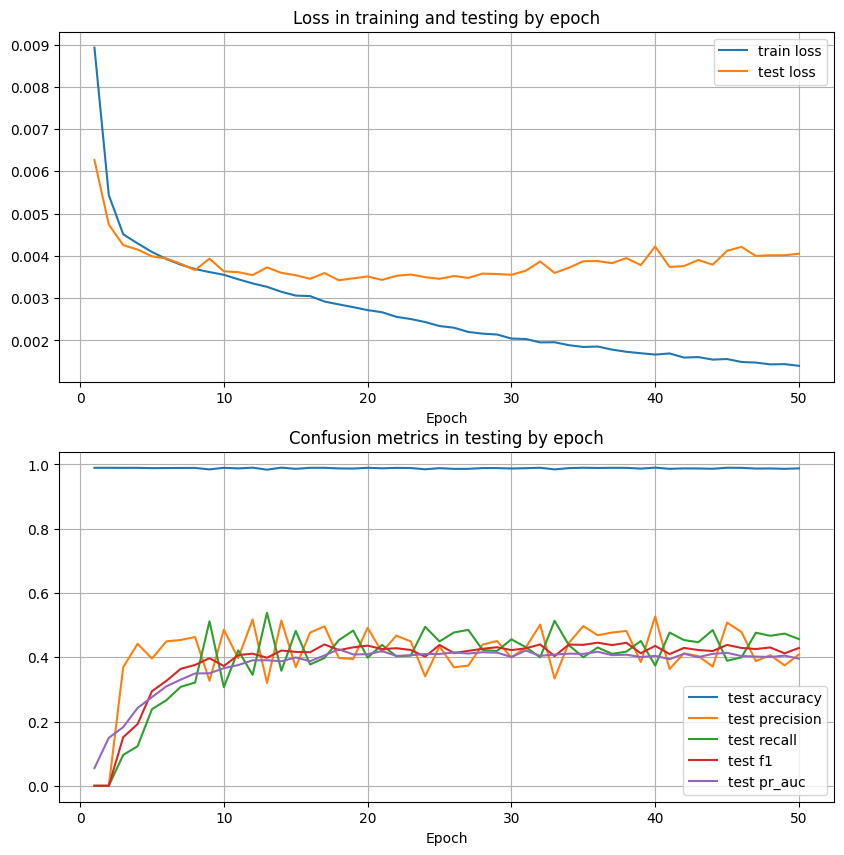

In [6]:

print(f"Training ends {datetime.now().isoformat()}")
for metric in ["accuracy", "precision", "recall", "f1", "mcc", "pr_auc"]:
    if len(model_metrics[f"test_{metric}"]) > 0:
        print(f"Test {metric}:", model_metrics[f"test_{metric}"][-1])

plot_model_metrics(model_metrics)

In [7]:
torch.save(model, "model.pickle")